<a href="https://colab.research.google.com/github/damianlukawski/TensorFlow_101/blob/main/Neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [3]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels)= fashion_mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
x=0
for i in train_images[0]:
  print(train_images[0,x,22])
  x=x+1
  

0
0
0
0
1
0
64
122
164
224
213
224
222
234
229
219
250
221
204
217
209
177
176
188
166
0
0
0


In [6]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

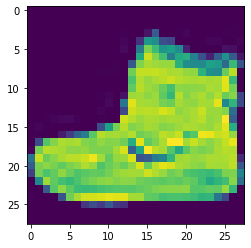

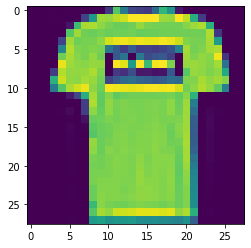

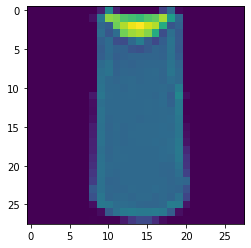

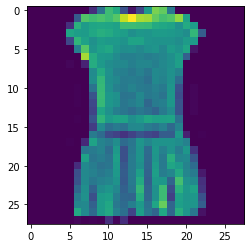

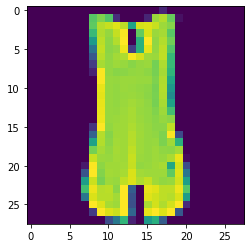

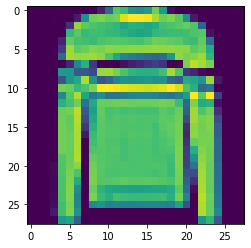

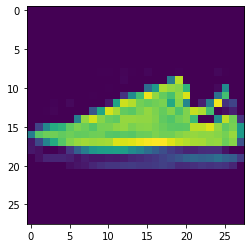

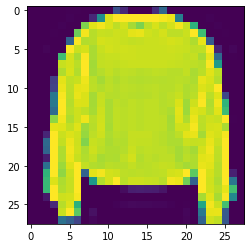

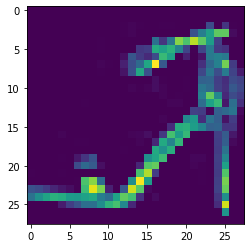

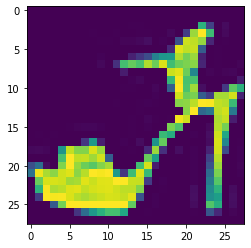

In [10]:
plt.figure()
i=0
while (i<10):
  plt.imshow(train_images[i])
  i=i+1
  #plt.colorbar()
  #plt.grid(False)
  plt.show()

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [12]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [16]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10,activation='softmax')                    
])

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4977 - accuracy: 0.8276
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3773 - accuracy: 0.8639
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3354 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3130 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2935 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2810 - accuracy: 0.8969
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2675 - accuracy: 0.9017
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2561 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2483 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.237

In [22]:
test_loss, test_acc=model.evaluate(test_images, test_labels, verbose=1)
print('test accuracy: %s' %(test_acc))

313/313 [==============================] - 0s 1ms/step - loss: 0.3310 - accuracy: 0.8842
test accuracy: 0.8841999769210815


In [23]:
predictions=model.predict(test_images)

In [24]:
predictions[0]

array([2.8071725e-08, 6.2573201e-07, 1.8124085e-08, 9.8612851e-09,
       2.9368346e-08, 2.1367222e-03, 9.1127719e-09, 1.1488259e-02,
       1.0071416e-06, 9.8637319e-01], dtype=float32)

Ankle boot


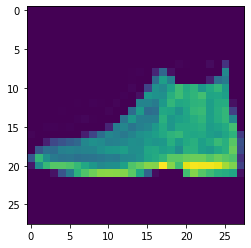

Pullover


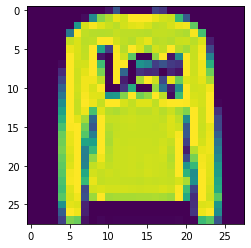

Trouser


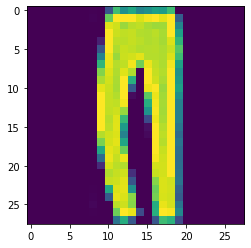

Trouser


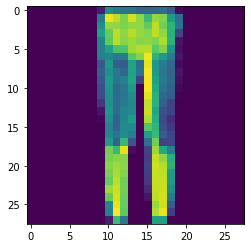

Shirt


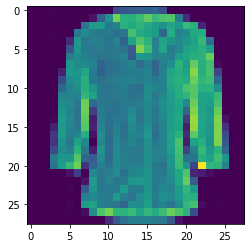

Trouser


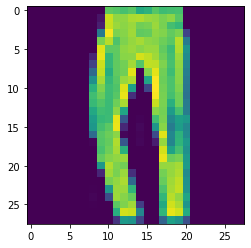

Coat


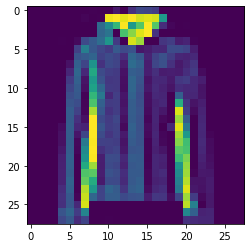

Shirt


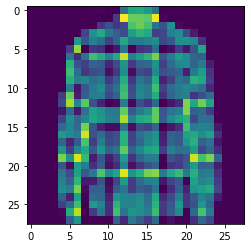

Sandal


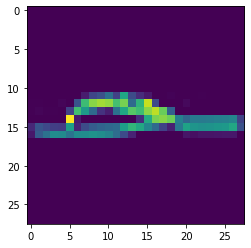

Sneaker


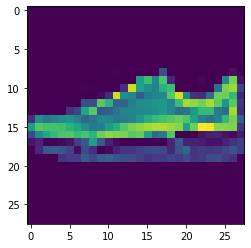

In [32]:
i=0
while i<10:
  print(class_names[np.argmax(predictions[i])])
  plt.figure()
  plt.imshow(test_images[i])
  plt.show()
  i=i+1